In [1]:
# import the needed libraries

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt

import sklearn.metrics

from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier

from sklearn.cross_validation import train_test_split

# Getting and cleaning data

AH_data = pd.read_csv(r'D://tree_addhealth.csv')

data_clean = AH_data.dropna()

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Set the Predictors/ Input variables / Features

predictors =data_clean[['PARPRES','marever1','ALCPROBS1','DEVIANT1']]

In [3]:
#Set the target variable 

targets = data_clean.EXPEL1

In [4]:
# 60% of the data will be considered for trainin and 40% for testing

pred_train, pred_test, tar_train, tar_test=train_test_split(predictors, targets, test_size=.4)

In [5]:
print(pred_train.shape)
print(pred_test.shape)
print(tar_train.shape)
print(tar_test.shape)



(2745, 4)
(1830, 4)
(2745,)
(1830,)


In [6]:
#Build model on training data

#import the needed libraries 
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=25)

# fit the model with the training data of predictors and targets

classifier=classifier.fit(pred_train,tar_train)
predictions=classifier.predict(pred_test)

sklearn.metrics.confusion_matrix(tar_test,predictions)


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.9519125683060109

In [9]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.9540983606557377

In [11]:
# display the relative importance of each attribute
print(classifier.feature_importances_)

[0.2788006  0.05299458 0.18101779 0.48718703]


In [7]:
#build a random forest classifier from 1 to 25 and find the accuracy score for each of those trees and storing them in array

trees=range(25)
accuracy=np.zeros(25)

for idx in range(len(trees)):
  classifier=RandomForestClassifier(n_estimators=idx + 1)
  classifier=classifier.fit(pred_train,tar_train)
  predictions=classifier.predict(pred_test)
  accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)

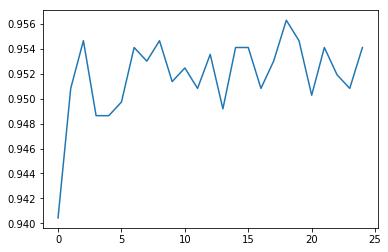

In [8]:
#plot all the accuracy values as the number of trees increase

plt.cla()
plt.plot(trees, accuracy)

#### The accuracy of the forest is 0.954 , so nearly 95% were classified correctly.
#### The explanatory variables with the highest relative importance scores are parental presence and deviant behavior .
#### the overall accuracy of the forest is 95% and it was reached with a number of trees equals 25 ; the plot of accuracy and the number of trees suggests that 3 and 18 estimators are also good alternatives to obtain the best accuracy score .